In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./ml_source_files/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [34]:
from scipy.stats import skew

In [35]:
df.apply(lambda x: skew(x))

age                         0.420937
anaemia                     0.276863
creatinine_phosphokinase    4.440689
diabetes                    0.332251
ejection_fraction           0.552593
high_blood_pressure         0.623583
platelets                   1.454975
serum_creatinine            4.433610
serum_sodium               -1.042870
sex                        -0.623583
smoking                     0.766479
time                        0.127161
DEATH_EVENT                 0.766479
dtype: float64

In [5]:
# 사망을 예측하는 모델을 만들고 평가하시오..

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

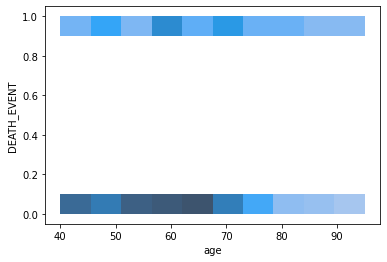

In [9]:
sns.histplot(x='age', y='DEATH_EVENT', data=df, kde=True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

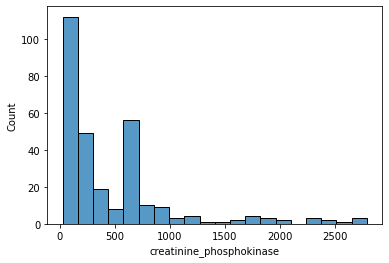

In [10]:
sns.histplot(data = df.loc[df['creatinine_phosphokinase']<3000, 'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

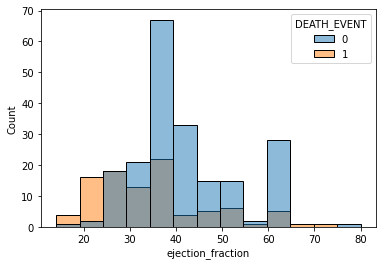

In [12]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT')

<AxesSubplot:xlabel='platelets', ylabel='Count'>

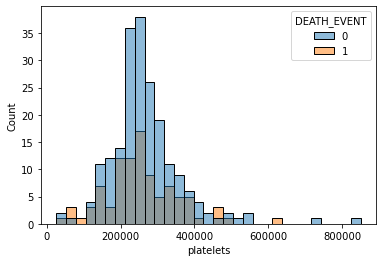

In [13]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

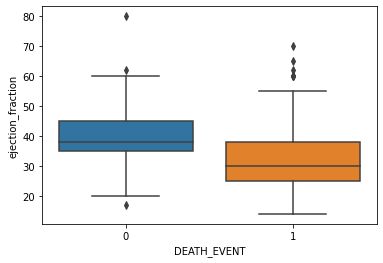

In [14]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='smoking'>

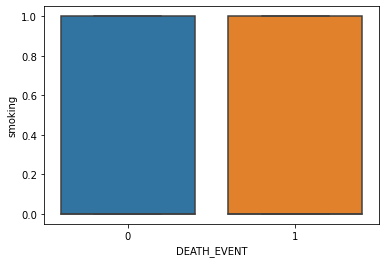

In [15]:
sns.boxplot(x='DEATH_EVENT', y='smoking', data=df)

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
y = df.DEATH_EVENT
x = df.drop('DEATH_EVENT', axis=1)

In [19]:
x.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

In [20]:
x.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [28]:
import warnings
warnings.filterwarnings(action='ignore') 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [23]:
log = LogisticRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [24]:
models = [log, rfc, xgb, lgbm]

In [29]:
trained_models = []
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    proba = m.predict_proba(x_test)[:,1]
    
    print('=======================')
    print(m.__class__.__name__)
    print(classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.89      0.74      0.81        23

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60

roc_auc_score : 0.9224441833137486
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.94      0.74      0.83        23

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60

roc_auc_score : 0.9482961222091657
[11:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

In [30]:
# scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
trained_models = []
for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)[:,1]
    
    print('=======================')
    print(m.__class__.__name__)
    print(classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.95      0.78      0.86        23

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

roc_auc_score : 0.9212690951821386
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.95      0.83      0.88        23

    accuracy                           0.92        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60

roc_auc_score : 0.9529964747356051
[11:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

In [ ]:
# skewness => np.log1p

In [41]:
x_train_scaled[:, 2] = np.log1p(x_train_scaled[:, 2])
x_train_scaled[:, 7] = np.log1p(x_train_scaled[:, 7])

In [42]:
trained_models = []
for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)[:,1]
    
    print('=======================')
    print(m.__class__.__name__)
    print(classification_report(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.90      0.78      0.84        23

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60

roc_auc_score : 0.917743830787309
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.87      0.87      0.87        23

    accuracy                           0.90        60
   macro avg       0.89      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60

roc_auc_score : 0.9553466509988249
[11:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo